# ROC Curves and Precision-Recall Curves for Classification in Python

Source: `https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/`

## ROC Curves (Receiver Operating Characteristic curves)

`True Positive Rate = True Positives / (True Positives + False Negatives)`

True Positive Rate = Sensitivity

`Sensitivity = True Positives / (True Positives + False Negatives)`

`False Positive Rate = False Positives / (False Positives + True Negatives)`

`Specificity = True Negatives / (True Negatives + False Positives)`

`False Positive Rate = 1 - Specificity`

The ROC curve is a useful tool for a few reasons:

    1. The curves of different models can be compared directly in general or for different thresholds.
    2. The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

    1. Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
    2. Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)

# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


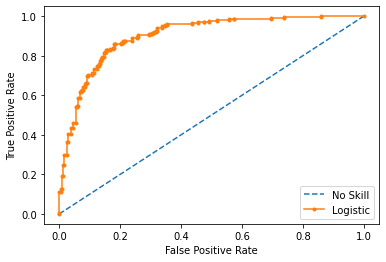

In [24]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
# Returns the probability of the sample for each class in the model,
# where classes are ordered as they are in self.classes_.
# lr_probs.shape --> (500, 2)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# lr_probs.shape --> (500,)

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, tresholds = roc_curve(testy, lr_probs)
# lr_fpr.shape --> (122,)
# lr_tpr.sahpe --> (122,)
# tresholds --> (122,)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Precision-Recall Curves

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.


`Precision = True Positives / (True Positives + False Positives)`

`Recall (Sensitivity) = True Positives / (True Positives + False Negatives)`
Recall = Sensitivity

There are also composite scores that attempt to summarize the precision and recall; two examples include:

   `F-Measure or F1 score`: that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates).
   `Area Under Curve`: like the `AUC`, summarizes the integral or an approximation of the area under the precision-recall curve.

In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)

# calculate F1 score
f1 = f1_score(testy, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

Logistic: f1=0.841 auc=0.898


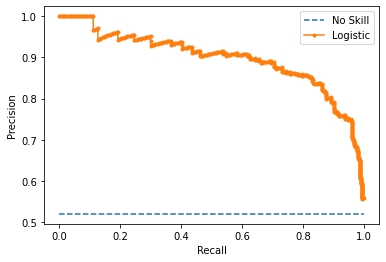

In [1]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1] # probabilities
# predict class values
yhat = model.predict(testX) # predicted calsses
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## ROC vs. Precision-Recall Curves

Generally, the use of ROC curves and precision-recall curves are as follows:

    1. ROC curves should be used when there are roughly equal numbers of observations for each class.
    2. Precision-Recall curves should be used when there is a moderate to large class imbalance.

## Imbalanced dataset problem 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


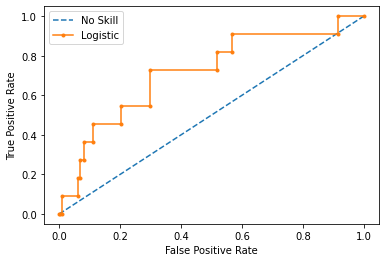

In [27]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Indeed, it has skill, but all of that skill is measured as making correct true negative predictions and there are a lot of negative predictions to make.

If you review the predictions, you will see that the model predicts the majority class (class 0) in all cases on the test set. The score is very misleading.

A plot of the ROC Curve confirms the AUC interpretation of a skilful model for most probability thresholds.

Logistic: f1=0.000 auc=0.054


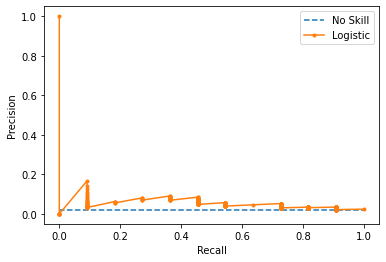

In [4]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)

pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Precision-Recall Curves in multiclass classification 

#### Loading pretrained MNIST Model

In [7]:
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, sampler
import torchvision
import torchvision.transforms as transforms

# device configuration 
# we use Cuda on GPU if possible 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters 

input_size = 784 # images are 28x28
hidden_size = 100 # can be different 
num_classes = 10 # 10 different digits are available 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

class NeuralNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) # We don't apply softmax() here because we will use Cross Entropy below 
        return out

FILE = 'mnist_model.pth'
model = NeuralNet(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load(FILE))
model.eval()

with torch.no_grad():
    n_correct = 0
    n_samples = 0 

    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1) # 1 = along rows
        n_correct += (predictions == labels).sum().item()
        n_samples += labels.shape[0]

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy = {acc}%')

Accuracy = 95.67%


In [16]:
images, labels = iter(test_loader).next()
images = images.reshape(-1, 28 * 28)
outputs = model(images)
outputs.shape # tensor (batch_size x num_classes) of probabilities 

torch.Size([100, 10])

In [18]:
import torch.nn.functional as F

true_labels = []
preds = []

with torch.no_grad():
    n_correct = 0
    n_samples = 0 

    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        predicted_probs = [F.softmax(output, dim=0) for output in outputs]

        true_labels.append(labels)
        preds.append(predicted_probs)
        
    true_labels = torch.cat(true_labels)
    preds = torch.cat([torch.stack(batch) for batch in preds])

print(f'true_labels shape is {true_labels.shape}')
print(f'preds shape is {preds.shape}')

true_labels shape is torch.Size([10000])
preds shape is torch.Size([10000, 10])


Each column is `preds` represents probabilities for each class respectively => we can apply PR curves for each class

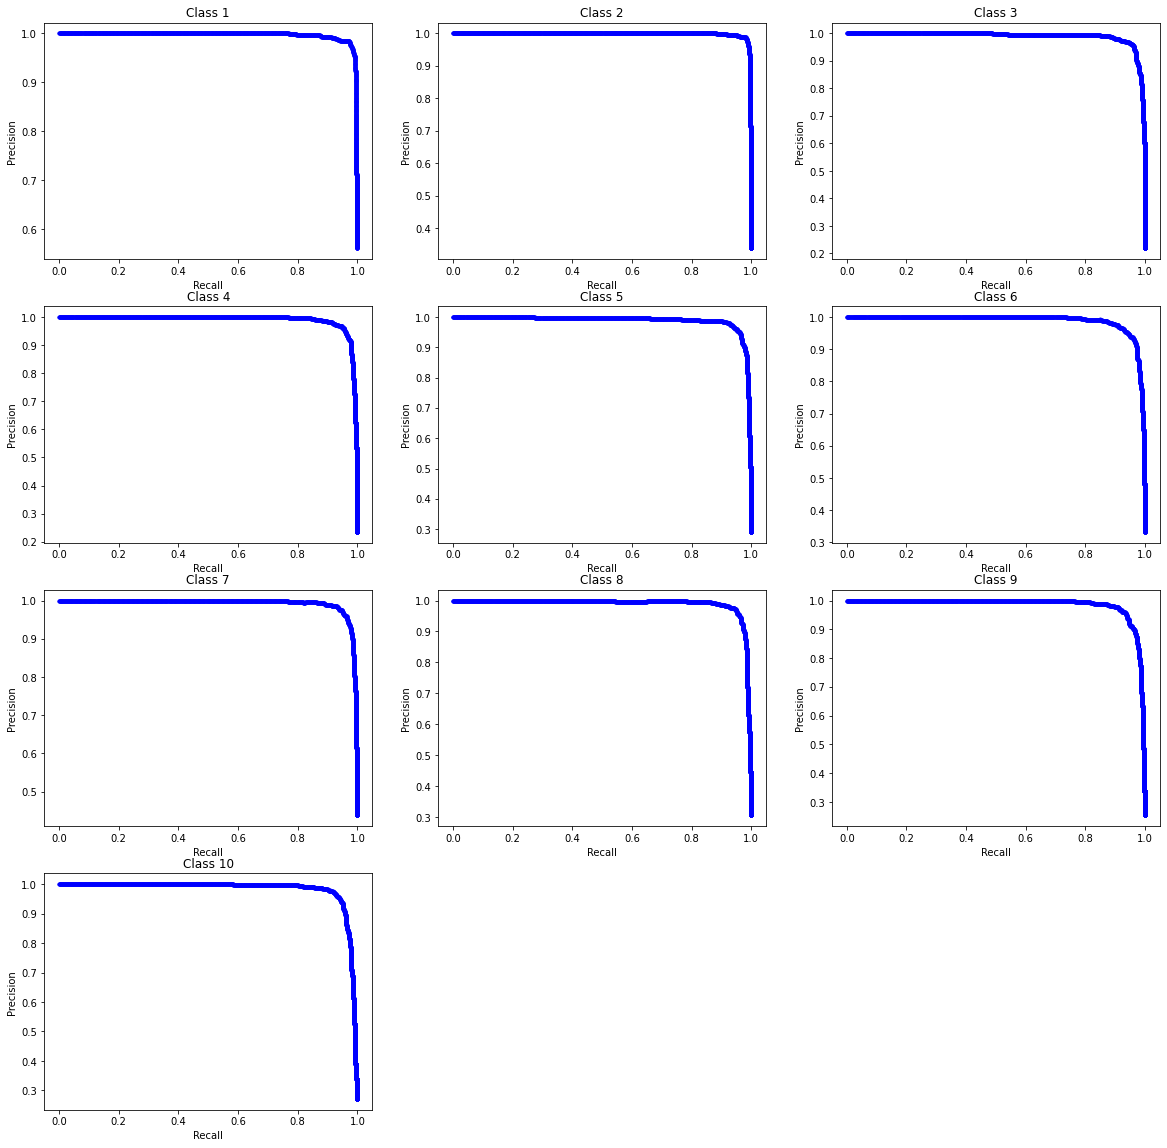

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for class_index in range(10):
    lr_precision, lr_recall, _ = precision_recall_curve(true_labels == class_index, preds[:, class_index])
    plt.subplot(4, 3, class_index+1)
    plt.plot(lr_recall, lr_precision, '.b-', label='Logistic')
    plt.title(f'Class {class_index+1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.show()